In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")

In [5]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [8]:
from langchain_core.messages import HumanMessage, SystemMessage

# System message
title_creator_sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing to create blog title for the provided the text.")

def title_creator(state:MessagesState):
    return {"messages":[llm.invoke([title_creator_sys_msg] + state["messages"])]}

content_creator_sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing to create blog content for the given title")
def content_creator(state:MessagesState):
    return {"messages":[llm.invoke([content_creator_sys_msg] + state["messages"])]}

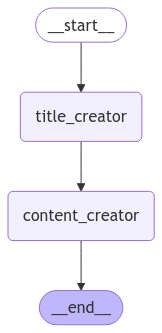

In [11]:
from langgraph.graph import START, StateGraph, END
from IPython.display import Image, display


builder=StateGraph(MessagesState)

## Define the node
builder.add_node("title_creator",title_creator)
builder.add_node("content_creator",content_creator)

## Define the edges
builder.add_edge(START,"title_creator")
builder.add_edge("title_creator","content_creator")
builder.add_edge("content_creator",END)
react_graph=builder.compile()
# Show
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [12]:
messages = [HumanMessage(content="what is machine learning?")]
messages = react_graph.invoke({"messages": messages})

In [13]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is machine learning?
================================== Ai Message ==================================

"Unraveling Machine Learning: A Beginner's Guide to Understanding the Basics"
================================== Ai Message ==================================

Machine learning is a fascinating and rapidly evolving field that has gained significant attention across industries, from technology to healthcare, finance, and beyond. At its core, machine learning is a subset of artificial intelligence (AI) which focuses on the development of algorithms that allow computers to learn from and make predictions or decisions based on data. Unlike traditional programming, where a human writes explicit instructions for a task, machine learning systems identify patterns and make decisions with minimal human intervention.

### What is Machine Learning?

Machine learning can be thought of as teaching computers to l